## Exploratory Data Analysis and Feature Selection/Engineering

In [1]:
# Standard packages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# My custom transformations py file.
import transformations

# Sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

In [2]:
# Some helpers for displaying contingency tables:

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
def contingency_table(df, attribute):
    return display_side_by_side(pd.crosstab(df[attribute], df['IS_FRAUDSTER'],
                                            normalize='index', margins=True),
                     pd.crosstab(df[attribute], df['IS_FRAUDSTER'], margins=True))

In [3]:
# Load in the data.

df_transactions = pd.read_pickle('dataframes/df_transactions.pkl')
df_users = pd.read_pickle('dataframes/df_users.pkl')
df_fx = pd.read_pickle('dataframes/df_fx.pkl')
df_currency = pd.read_pickle('dataframes/df_currency.pkl')

In [4]:
# Add the query from part 2 as a feature to users. This will also standardize the amount of transaction to USD.

df_users, df_transactions = transformations.query2(df_users, df_transactions, df_fx, df_currency)

In [5]:
df_transactions.head()

,CURRENCY,AMOUNT,AMOUNT_USD,STATE,CREATED_DATE,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,ID
0,GBP,37.38,50.246872,COMPLETED,2015-10-11 09:05:43.016000,bar,AU,misc,7285c1ec-31d0-4022-b311-0ad9227ef7f4,CARD_PAYMENT,GAIA,5a9ee109-e9b3-4598-8dd7-587591e6a470
1,GBP,5.88,7.904002,COMPLETED,2015-10-11 20:08:39.150000,NaN,CA,misc,20100a1d-12bc-41ed-a5e1-bc46216e9696,CARD_PAYMENT,GAIA,28d68bf4-460b-4c8e-9b95-bcda9ab596b5
2,GBP,12.64,16.990917,COMPLETED,2015-10-11 11:37:40.908000,NaN,UA,misc,0fe472c9-cf3e-4e43-90f3-a0cfb6a4f1f0,CARD_PAYMENT,GAIA,1f1e8817-d40b-4c09-b718-cfc4a6f211df
3,GBP,0.66,0.887184,REVERTED,2015-10-11 20:08:35.310000,NaN,CA,misc,20100a1d-12bc-41ed-a5e1-bc46216e9696,CARD_PAYMENT,GAIA,a7aaf78c-d201-456f-9e6d-612a795e8c32
4,GBP,9.68,13.012031,COMPLETED,2015-10-11 02:46:47.640000,supermarket,NZ,misc,821014c5-af06-40ff-91f4-77fe7667809f,CARD_PAYMENT,GAIA,27dd99a2-5539-4ba9-876a-1a94abc2701f


In [6]:
df_users.head()

,FAILED_SIGN_IN_ATTEMPTS,KYC,BIRTH_YEAR,COUNTRY,STATE,CREATED_DATE,TERMS_VERSION,PHONE_COUNTRY,HAS_EMAIL,ID,IS_FRAUDSTER,FIRST_SUCCESS,AMOUNT_USD
0,0,PASSED,1971,GB,ACTIVE,2017-08-06 07:33:33.341000,2018-05-25,GB||JE||IM||GG,True,1872820f-e3ac-4c02-bdc7-727897b60043,False,0,672.026698
1,0,PASSED,1982,GB,ACTIVE,2017-03-07 10:18:59.427000,2018-01-01,GB||JE||IM||GG,True,545ff94d-66f8-4bea-b398-84425fb2301e,False,0,536.595261
2,0,PASSED,1973,ES,ACTIVE,2018-05-31 04:41:24.672000,2018-09-20,ES,True,10376f1a-a28a-4885-8daa-c8ca496026bb,False,0,467.905360
3,0,PASSED,1986,FR,ACTIVE,2018-06-01 17:24:23.852000,2018-05-25,FR,True,fd308db7-0753-4377-879f-6ecf2af14e4f,False,0,17.619930
4,0,PASSED,1989,GB,ACTIVE,2017-08-09 15:03:33.945000,2018-09-20,GB||JE||IM||GG,True,755fe256-a34d-4853-b7ca-d9bb991a86d3,False,0,0.000000


In [7]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10300 entries, 0 to 10299
Data columns (total 13 columns):
FAILED_SIGN_IN_ATTEMPTS    10300 non-null int64
KYC                        10300 non-null object
BIRTH_YEAR                 10300 non-null int64
COUNTRY                    10300 non-null object
STATE                      10300 non-null object
CREATED_DATE               10300 non-null object
TERMS_VERSION              10300 non-null object
PHONE_COUNTRY              10300 non-null object
HAS_EMAIL                  10300 non-null bool
ID                         10300 non-null object
IS_FRAUDSTER               10300 non-null bool
FIRST_SUCCESS              10300 non-null int64
AMOUNT_USD                 10300 non-null float64
dtypes: bool(2), float64(1), int64(3), object(7)
memory usage: 985.7+ KB


In [8]:
# We observe that MERCHANT_CATEGORY and MERCHANT_COUNTRY have lots of NaN values... Merchant country was going to 
# be one of the main things I was going to look at (comparing it with the country of the user) so this is sad news.

df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688651 entries, 0 to 688650
Data columns (total 12 columns):
CURRENCY             688651 non-null object
AMOUNT               688651 non-null float64
AMOUNT_USD           688651 non-null float64
STATE                688651 non-null object
CREATED_DATE         688651 non-null object
MERCHANT_CATEGORY    223065 non-null object
MERCHANT_COUNTRY     483073 non-null object
ENTRY_METHOD         688651 non-null object
USER_ID              688651 non-null object
TYPE                 688651 non-null object
SOURCE               688651 non-null object
ID                   688651 non-null object
dtypes: float64(2), object(10)
memory usage: 68.3+ MB


In [9]:
# This will only give descriptive statistics of the numerical attributes.

df_users.describe()

,FAILED_SIGN_IN_ATTEMPTS,BIRTH_YEAR,FIRST_SUCCESS,AMOUNT_USD
count,10300.000000,10300.000000,10300.000000,10300.000000
mean,0.008058,1983.428155,0.096602,432.855329
std,0.128603,11.377389,0.295429,765.200011
min,0.000000,1927.000000,0.000000,0.000000
25%,0.000000,1978.000000,0.000000,0.000000
50%,0.000000,1986.000000,0.000000,100.091548
75%,0.000000,1992.000000,0.000000,537.268653
max,6.000000,2000.000000,1.000000,4987.020000


In [10]:
# Note that the min value for AMOUNT_USD is negative. Upon further inspection, it seems that the given fx rates has some 
# USDHUF values as negative rates. This is what explains those negative transactions (this only occurs for CCY=='HUFF') 

df_transactions.describe()

,AMOUNT,AMOUNT_USD
count,6.886510e+05,688651.000000
mean,1.782898e+02,104.921374
std,1.640851e+04,1044.094983
min,0.000000e+00,-123.591202
25%,4.800000e+00,5.437527
50%,1.416000e+01,15.554085
75%,5.000000e+01,56.725942
max,9.000000e+06,187031.482494


Let's now observe the class balance of the label. This will be a skewed classifcation task as there are much fewer
fraudsters than regular users. This entails we will most likely need to make use of techniques such as undersampling and SMOTE (Synthetic Minority Over-Sampling Technique) as these are effective solutions in combatting class skew in classfication tasks.

In [11]:
print('Fraudulent users comprise', round(df_users['IS_FRAUDSTER'].value_counts()[1]/len(df_users)*100, 2), '% of dataset')
print('Legitimate users comprise', round(df_users['IS_FRAUDSTER'].value_counts()[0]/len(df_users)*100, 2), '% of dataset')

Fraudulent users comprise 2.91 % of dataset
Legitimate users comprise 97.09 % of dataset


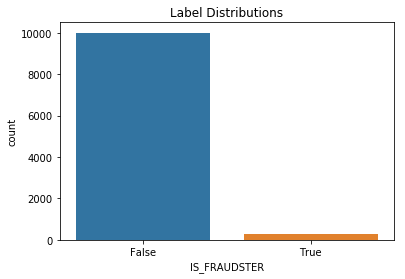

In [12]:
sns.countplot('IS_FRAUDSTER', data=df_users)
plt.title('Label Distributions')
plt.figure(figsize=(20, 10))

## Users Data Exploration

Now let's observe the users in more detail as this is what we're trying to predict as being fraudulent or not (not the
individual transactions themselves -- though we will extract useful features for users using the transactions table too).

Let's go through each feature in Users in turn.

### Failed Sign in Attemps
Most users will have 0 as we noticed above

0    10248
1       28
2       20
3        3
6        1
Name: FAILED_SIGN_IN_ATTEMPTS, dtype: int64


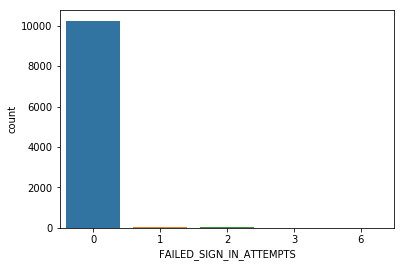

In [13]:
print(df_users['FAILED_SIGN_IN_ATTEMPTS'].value_counts())
sns.countplot(df_users['FAILED_SIGN_IN_ATTEMPTS'])

In [14]:
# Cross tabulate (contingency table) this with the label (left is normalized by row and the right is unnormalized)

contingency_table(df_users, 'FAILED_SIGN_IN_ATTEMPTS')    

IS_FRAUDSTER 
 False 
 True 
 
 
 FAILED_SIGN_IN_ATTEMPTS 
 
 
 
 
 
 
 0 
 0.971019 
 0.028981 
 
 
 1 
 0.964286 
 0.035714 
 
 
 2 
 0.900000 
 0.100000 
 
 
 3 
 1.000000 
 0.000000 
 
 
 6 
 1.000000 
 0.000000 
 
 
 All 
 0.970874 
 0.029126 
 
 
 
 
 
 IS_FRAUDSTER 
 False 
 True 
 All 
 
 
 FAILED_SIGN_IN_ATTEMPTS 
 
 
 
 
 
 
 
 0 
 9951 
 297 
 10248 
 
 
 1 
 27 
 1 
 28 
 
 
 2 
 18 
 2 
 20 
 
 
 3 
 3 
 0 
 3 
 
 
 6 
 1 
 0 
 1 
 
 
 All 
 10000 
 300 
 10300

We see that isn't much of a connection between IS_FRAUDSTER and FAILED_SIGN_IN_ATTEMPS. So we will drop this feature.

### KYC

PASSED     7166
NONE       2764
FAILED      292
PENDING      78
Name: KYC, dtype: int64


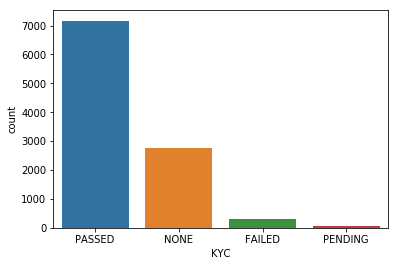

In [15]:
#KYC indicates status of the user's identity verifcation process.

print(df_users['KYC'].value_counts())
sns.countplot(df_users['KYC'])

In [16]:
# Let's look at the cross tabulation (contingency table) between KYC and FRAUDSTER 
contingency_table(df_users, 'KYC')                   

IS_FRAUDSTER 
 False 
 True 
 
 
 KYC 
 
 
 
 
 
 
 FAILED 
 0.924658 
 0.075342 
 
 
 NONE 
 0.999638 
 0.000362 
 
 
 PASSED 
 0.963718 
 0.036282 
 
 
 PENDING 
 0.782051 
 0.217949 
 
 
 All 
 0.970874 
 0.029126 
 
 
 
 
 
 IS_FRAUDSTER 
 False 
 True 
 All 
 
 
 KYC 
 
 
 
 
 
 
 
 FAILED 
 270 
 22 
 292 
 
 
 NONE 
 2763 
 1 
 2764 
 
 
 PASSED 
 6906 
 260 
 7166 
 
 
 PENDING 
 61 
 17 
 78 
 
 
 All 
 10000 
 300 
 10300

From this we gather KYC=NONE usually denotes an non-fraudster whereas KYC==PENDING has an unsually high number of fradsters (though the sample size is small so we can't make conclusions). Failed also shows some results indicating a failed KYC has a higher chance of being a fruadster (which aligns with intuition well).

In summary, this feature is useful from this preliminary analysis and it will be kept.

### Birth Year

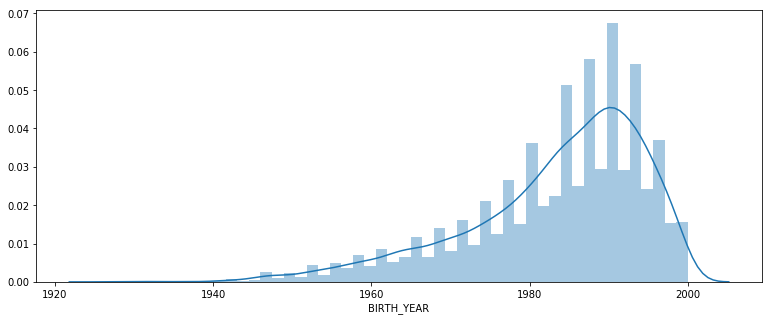

In [17]:
fig, ax = plt.subplots(figsize=(13, 5))
sns.distplot(df_users['BIRTH_YEAR'])

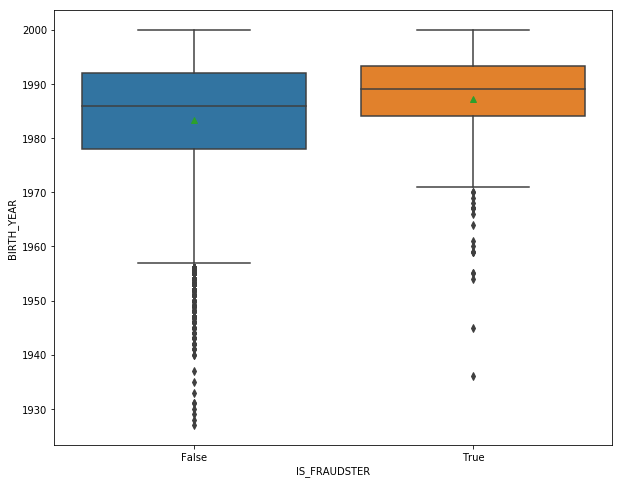

In [18]:
# Let's look at the boxplot

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='IS_FRAUDSTER', y='BIRTH_YEAR', data=df_users, showmeans=True)

Note the imbalance of the data means that the left boxplot represents the ages of non-fraudsters better than the boxplot on the right represents the ages of fraudsters. Nonetheless, it's still clear that fraudsters tend to be on the younger side despite (it's highly unlikely for this to be chance -- it can be checked more throughly via formal statistical methods but I'll just rely on intuition here for the sake of time).

We note from the distplot that Revolut's demographic seems to tend towards the younger side which makes sense. Furthermore, the younger users (1987 onwards) tend to be a fraudster's more often than the older ones. This is a good feature overall and we'll hang onto it.

### Country

GB    4673
FR    1325
PL     667
LT     492
IE     420
ES     396
GR     309
DE     221
RO     220
CH     187
Name: COUNTRY, dtype: int64


Text(0.5,1,'Top 10 Most Registered Countries')

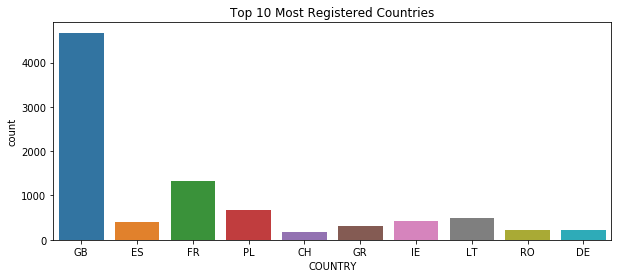

In [19]:
country_counts = df_users['COUNTRY'].value_counts().head(10)
top_countries = country_counts.index
print(country_counts)
fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(df_users[df_users['COUNTRY'].isin(top_countries)]['COUNTRY'])
ax.set_title('Top 10 Most Registered Countries')

In [20]:
display_side_by_side(
    pd.crosstab(df_users[df_users['COUNTRY'].isin(top_countries)]['COUNTRY'], df_users['IS_FRAUDSTER'], normalize='index'),
    pd.crosstab(df_users[df_users['COUNTRY'].isin(top_countries)]['COUNTRY'], df_users['IS_FRAUDSTER']))

IS_FRAUDSTER,False,True
COUNTRY,,
CH,1.000000,0.000000
DE,0.995475,0.004525
ES,0.992424,0.007576
FR,0.997736,0.002264
GB,0.942221,0.057779
GR,1.000000,0.000000
IE,1.000000,0.000000
LT,0.971545,0.028455
PL,0.997001,0.002999


GB tends to have a higher number of fraudsters relative to others countries. Also this feature may be highly useful when looking at transactions and looking to see if merchant_country differs from user country (i.e. indicating a users card being used by someone else in a different country).

In summary, we keep this feature, it seems quite useful. We will probably turn this into a boolean feature, whether the user country is GB or not. And also a seperate feature to check user country and merchant country may be made depending on the results we find when we inspect the transactions table

### State

In [21]:
df_users['STATE'].value_counts()

ACTIVE    10000
LOCKED      300
Name: STATE, dtype: int64

In [22]:
contingency_table(df_users, 'STATE')

IS_FRAUDSTER 
 False 
 True 
 
 
 STATE 
 
 
 
 
 
 
 ACTIVE 
 1.000000 
 0.000000 
 
 
 LOCKED 
 0.000000 
 1.000000 
 
 
 All 
 0.970874 
 0.029126 
 
 
 
 
 
 IS_FRAUDSTER 
 False 
 True 
 All 
 
 
 STATE 
 
 
 
 
 
 
 
 ACTIVE 
 10000 
 0 
 10000 
 
 
 LOCKED 
 0 
 300 
 300 
 
 
 All 
 10000 
 300 
 10300

So basically we see that if LOCKED is true then the user is a fraudster and if it false then the user is not a fraudster. Therefore, we will NOT use this as a feature in the ML model but rather as a hard rule before we utilize the model to make predictions. The rule is simple: STATE=='LOCKED' then predict FRAUDSTER with 100% confidence. If
STATE=='ACTIVE' then we pass the features (which do NOT include STATE) to the ML model. If we did pass this feature in, the model would learn to predict ACTIVE users as not-fraud (which is not what we want since we're trying to predict ACTIVE fraudsters) and every LOCKED user as fraud (we do want this however as this user has been locked for a reason and until his status reverts to ACTIVE, he/she is a fraudster).

### Created Date

The main idea here is we're going to convert the created_date to an abolsute measure (in days) from the earliest date recorded (2015-3-3). An ML model needs a numeric attribute and not a date.

In [23]:
df_users = transformations.date_to_numerical(df_users)

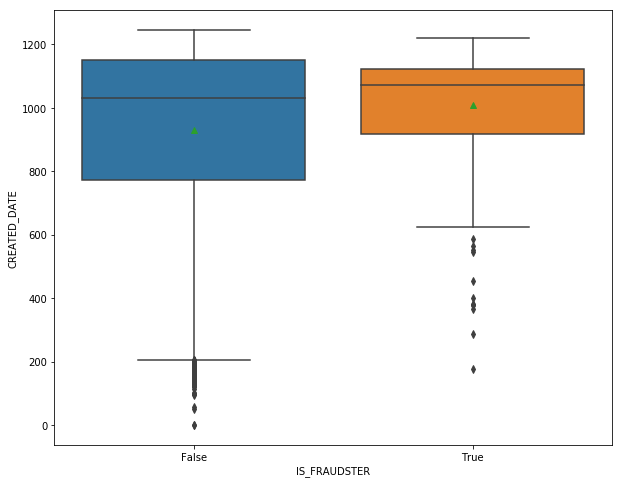

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='IS_FRAUDSTER', y='CREATED_DATE', data=df_users, showmeans=True)

It seems that newer accounts correspond slighly more to fraudsters. I'll keep this feature for now to be on the safe side...

### Terms version

This is more or less a categorical variable. 1900-01-01 correpsonds to missing value.

In [25]:
df_users['TERMS_VERSION'].unique()

array(['2018-05-25', '2018-01-01', '2018-09-20', '2018-03-20',
       '2018-01-13', '1900-01-01', '2017-01-16', '2017-02-02'],
      dtype=object)

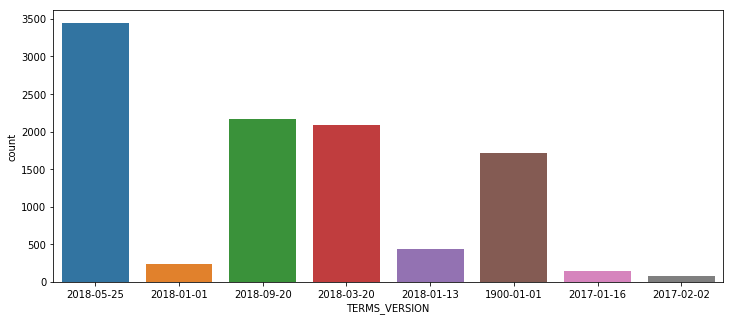

In [26]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.countplot(df_users['TERMS_VERSION'])

In [27]:
## Crosstab

contingency_table(df_users, 'TERMS_VERSION')

IS_FRAUDSTER,False,True
TERMS_VERSION,,
1900-01-01,0.960234,0.039766
2017-01-16,1.000000,0.000000
2017-02-02,0.881579,0.118421
2018-01-01,0.949580,0.050420
2018-01-13,0.986456,0.013544
2018-03-20,0.945455,0.054545
2018-05-25,0.973570,0.026430
2018-09-20,1.000000,0.000000
All,0.970874,0.029126


Hmm this seems useful actually. It seems users that are not up to date are more likely to be fraudster than those who are up tp date. Let's turn this into a boolean feature and see the results. Note: I will treat missing values (1900-01-01) as not the latest terms as this makes the most sense. This person has probably not accepted a terms version which is suspect behavior (as can be seen in the crosstab above where NaNs have a slightly higher fraudster rate).

In [28]:
df_users = transformations.terms_version_boolean(df_users)

In [29]:
contingency_table(df_users, 'TERMS_VERSION')

IS_FRAUDSTER 
 False 
 True 
 
 
 TERMS_VERSION 
 
 
 
 
 
 
 0 
 0.963145 
 0.036855 
 
 
 1 
 1.000000 
 0.000000 
 
 
 All 
 0.970874 
 0.029126 
 
 
 
 
 
 IS_FRAUDSTER 
 False 
 True 
 All 
 
 
 TERMS_VERSION 
 
 
 
 
 
 
 
 0 
 7840 
 300 
 8140 
 
 
 1 
 2160 
 0 
 2160 
 
 
 All 
 10000 
 300 
 10300

Seems quite useful for checking if someone is not a fraudster. Keep this feature in the boolean form as above.

### Phone Country

The main thought I want to explore here is: If the user country and the phone country don't match, is this an indication of fraudsters?

In [30]:
df_users['PHONE_COUNTRY'].unique()

array(['GB||JE||IM||GG', 'ES', 'FR', 'SI', 'PL', 'BE', 'CH', 'CZ', 'GR',
       'FI||AX', 'CY', 'IE', 'LT', 'US||PR||CA', 'MT', 'HU', 'RO', 'DK',
       'MY', 'DE', 'HR', 'BG', 'PT', 'RU||KZ', 'MK', 'NO||SJ||BV', 'BY',
       'IT', 'EE', 'LV', 'SE', 'JO', 'SK', 'GE', 'NL', 'AD', 'AT', 'IN',
       'NC', 'ZA', 'LU', 'GI', 'IS', 'ME', 'BR', 'SG', 'MX', 'CC||CX||AU',
       'NZ', 'TH', 'ID', 'EH||MA', 'TR', 'OM', 'BL||MF||GP', 'GF', 'PE',
       'MV', 'CO', 'MQ', 'QA', 'IL', 'AL', 'VN', 'JP', 'UA', 'AR', 'CN',
       'AZ', 'KR', 'TF||RE||YT', 'NP', 'BN', 'TW', 'MN', 'EG', 'HK', 'KG',
       'CM', 'AE', 'RS', 'SN', 'PH', 'MO', 'KY', 'DZ', 'CR'], dtype=object)

In [31]:
# Let's make a set from the phone countries and then we can simply check a set membership (COUNTRY in PHONE_COUNTRY)

df_users['PHONE_COUNTRY'] = df_users['PHONE_COUNTRY'].apply(lambda x: set(x.split('||')))

In [32]:
def check_membership(country, phone_country):
    return country in phone_country

df2 = df_users.copy()
df2['ctry_in_pctry'] = df_users.apply(lambda x: check_membership(x['COUNTRY'], x['PHONE_COUNTRY']), axis=1)

In [33]:
contingency_table(df2, 'ctry_in_pctry')

IS_FRAUDSTER 
 False 
 True 
 
 
 ctry_in_pctry 
 
 
 
 
 
 
 False 
 0.975845 
 0.024155 
 
 
 True 
 0.970666 
 0.029334 
 
 
 All 
 0.970874 
 0.029126 
 
 
 
 
 
 IS_FRAUDSTER 
 False 
 True 
 All 
 
 
 ctry_in_pctry 
 
 
 
 
 
 
 
 False 
 404 
 10 
 414 
 
 
 True 
 9596 
 290 
 9886 
 
 
 All 
 10000 
 300 
 10300

The findings above suggest that this is not a useful feature unfortunately. Therefore I will drop it.

### Has_email

In [34]:
contingency_table(df_users, 'HAS_EMAIL')

IS_FRAUDSTER 
 False 
 True 
 
 
 HAS_EMAIL 
 
 
 
 
 
 
 False 
 0.998478 
 0.001522 
 
 
 True 
 0.968993 
 0.031007 
 
 
 All 
 0.970874 
 0.029126 
 
 
 
 
 
 IS_FRAUDSTER 
 False 
 True 
 All 
 
 
 HAS_EMAIL 
 
 
 
 
 
 
 
 False 
 656 
 1 
 657 
 
 
 True 
 9344 
 299 
 9643 
 
 
 All 
 10000 
 300 
 10300

We see a perhaps unexpected result that no email seems to suggest non-fraudsters. But this doesn't make sense intuitively: Why would NOT registering an email imply NON-FRAUDS? There is probably some other factor that's unknown to me. But I will drop this feature as I don't want the machine learning model to learn to classify users without email addresses as non_fraudsters since that doesn't make intuitive sense to me. But it's imporant to make a note of it and come back to it and think about it more if I have time.

## Transactions Data Exploration

Since I'm now running a bit short on time and haven't had as much time as I'd have liked to work on this project due to Christmas, I will go through Transactions more briefly than Users. I will mostly try to use intuition to extract useful features to add to the Users dataset rather than giving it a thorough statistical treatment.

The idea here is that, since we're doing a user-level based classification, we want to try to do a groupby on the transactions on user_id and try to extract relevant summary features on a given users collection of transactions. I will go by in turn some transaction summary features that I think may be useful.

### Idea 1: Query from part 2.

The query we did in part 2 could be useful. This is a boolean feature that is true if the user's first purchase was over $10 and also passed through succesfully.

In [35]:
contingency_table(df_users, 'FIRST_SUCCESS')

IS_FRAUDSTER 
 False 
 True 
 
 
 FIRST_SUCCESS 
 
 
 
 
 
 
 0 
 0.972273 
 0.027727 
 
 
 1 
 0.957789 
 0.042211 
 
 
 All 
 0.970874 
 0.029126 
 
 
 
 
 
 IS_FRAUDSTER 
 False 
 True 
 All 
 
 
 FIRST_SUCCESS 
 
 
 
 
 
 
 
 0 
 9047 
 258 
 9305 
 
 
 1 
 953 
 42 
 995 
 
 
 All 
 10000 
 300 
 10300

Indeed, first purchases of greater than $10 (and successful) seem to be a little more likely to be frauds in comparison to the base distribution.

### Idea 2: If the most common MERCHANT_COUNTRY of the grouped transactions (by USER_ID) does not match the user COUNTRY, does this indicate fraudsters? 

Note this idea can be explored much more in depth by not just looking at the max MERCHANT_COUNTRY but other patterns such as abrupt changes in country, looking at MERCHANT_CATEGORY as well, and TYPE (ATM in a foreign country could mean fraud), abrupt changes in spending (small amount spent to large amount spent), and many others. But for the sake of time, I will keep it simple. If I find I have more time, I might explore some of those possibilities below.


In [36]:
# Look at transformations.py for the code.

df_users = transformations.countries_match(df_users, df_transactions)

In [37]:
contingency_table(df_users, 'COUNTRIES_MATCH')

IS_FRAUDSTER 
 False 
 True 
 
 
 COUNTRIES_MATCH 
 
 
 
 
 
 
 0 
 0.988555 
 0.011445 
 
 
 1 
 0.913793 
 0.086207 
 
 
 All 
 0.970874 
 0.029126 
 
 
 
 
 
 IS_FRAUDSTER 
 False 
 True 
 All 
 
 
 COUNTRIES_MATCH 
 
 
 
 
 
 
 
 0 
 7774 
 90 
 7864 
 
 
 1 
 2226 
 210 
 2436 
 
 
 All 
 10000 
 300 
 10300

These results show the opposite of what I thought I would find: Users that make purchases in their OWN country are more likely to be fraudsters than those who make purchases abroad. This makes sense however: Revolut is a popular choice for when making purchases abroad. What is perhaps more surprising is that users that use it to make purchases in their own country tend to be more likely to be more fraudsters and this is more significant than any of the other boolean features we've considered so far... This feature is very useful!

### Idea 3: Check the 'SOURCE' feature in transactions

In [38]:
# Check to see if the Source attribute in transactions helps:
df_users_source = transformations.max_count_extractor(df_users, df_transactions, 'SOURCE')
contingency_table(df_users_source, 'SOURCE')

IS_FRAUDSTER,False,True
SOURCE,,
APOLLO,1.000000,0.000000
CRONUS,0.948718,0.051282
GAIA,0.968070,0.031930
HERA,0.978817,0.021183
INTERNAL,0.995215,0.004785
LETO,0.987805,0.012195
LIMOS,0.960000,0.040000
MINOS,0.368421,0.631579
NYX,1.000000,0.000000


Whoa!! Users that mostly have MINOS are VERY likely to be fraudsters! I will encode this as a boolean feature MINOS or not MINOS. Not too many users use MINOS but the ones that do are quite often fraudsters with over 60% chance!

### Idea 4: Check 'STATE' feature in transactions

In [39]:
df_users_state = transformations.max_count_extractor(df_users, df_transactions, 'STATE')
contingency_table(df_users_state, 'STATE_y')

IS_FRAUDSTER 
 False 
 True 
 
 
 STATE_y 
 
 
 
 
 
 
 CANCELLED 
 1.000000 
 0.000000 
 
 
 COMPLETED 
 0.958134 
 0.041866 
 
 
 DECLINED 
 0.980916 
 0.019084 
 
 
 FAILED 
 0.982143 
 0.017857 
 
 
 PENDING 
 1.000000 
 0.000000 
 
 
 RECORDED 
 1.000000 
 0.000000 
 
 
 REVERTED 
 0.989505 
 0.010495 
 
 
 All 
 0.962723 
 0.037277 
 
 
 
 
 
 IS_FRAUDSTER 
 False 
 True 
 All 
 
 
 STATE_y 
 
 
 
 
 
 
 
 CANCELLED 
 5 
 0 
 5 
 
 
 COMPLETED 
 6408 
 280 
 6688 
 
 
 DECLINED 
 257 
 5 
 262 
 
 
 FAILED 
 385 
 7 
 392 
 
 
 PENDING 
 6 
 0 
 6 
 
 
 RECORDED 
 1 
 0 
 1 
 
 
 REVERTED 
 660 
 7 
 667 
 
 
 All 
 7722 
 299 
 8021

Nothing too useful in State information. We will not use this as a feature

### Idea 5: Check 'TYPE' feature in Transactions

In [40]:
df_users_type = transformations.max_count_extractor(df_users, df_transactions, 'TYPE')
contingency_table(df_users_type, 'TYPE')

IS_FRAUDSTER 
 False 
 True 
 
 
 TYPE 
 
 
 
 
 
 
 ATM 
 0.803922 
 0.196078 
 
 
 BANK_TRANSFER 
 0.838384 
 0.161616 
 
 
 CARD_PAYMENT 
 0.978158 
 0.021842 
 
 
 P2P 
 0.995370 
 0.004630 
 
 
 TOPUP 
 0.952630 
 0.047370 
 
 
 All 
 0.962723 
 0.037277 
 
 
 
 
 
 IS_FRAUDSTER 
 False 
 True 
 All 
 
 
 TYPE 
 
 
 
 
 
 
 
 ATM 
 164 
 40 
 204 
 
 
 BANK_TRANSFER 
 83 
 16 
 99 
 
 
 CARD_PAYMENT 
 4344 
 97 
 4441 
 
 
 P2P 
 215 
 1 
 216 
 
 
 TOPUP 
 2916 
 145 
 3061 
 
 
 All 
 7722 
 299 
 8021

And now we've stumbled upon another useful feature -- ATM and Bank transfers seems much more likely than the norm to indicate fraud. This is will be a categorical feature: ATM/Bank Transfer OR TOPOP OR Card_payment/P2P.

### Idea 6: Check max transaction by a user.

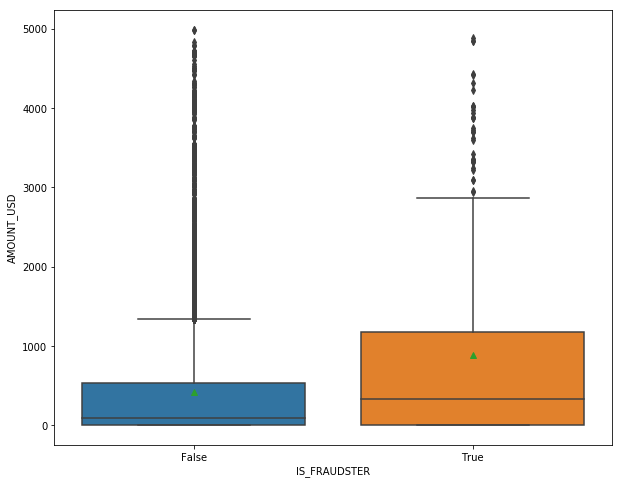

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='IS_FRAUDSTER', y='AMOUNT_USD', data=df_users, showmeans=True)

If we look at purchases under $5000, Fraudsters tend to spend more than legitimate users. We also note that the minimum purchase a fraudster will make is always quite sizeable as we can see from the first quartile of the boxplot on the right

### Final Idea: Users that haven't made any transactions can't be fraudsters by definition.

It's important to note the discrepency between the total number of users and the users in transactions. There are about 3000 fewer unique users in the transactions table than we have in the Users table. 

Intuition: These users that have made no transactions can't be fraudsters because they've never even purchased anything, right?

Let's check this intuition:

In [42]:
user_ids = set(df_transactions.groupby('USER_ID')['USER_ID'].first().values)

def userid_in_id(ID):
    return ID in user_ids
    
id_check = df_users.apply(lambda x: userid_in_id(x['ID']), axis=1)
df2 = df_users.copy()
df2['ID_CHECK'] = id_check
contingency_table(df2, 'ID_CHECK')

IS_FRAUDSTER 
 False 
 True 
 
 
 ID_CHECK 
 
 
 
 
 
 
 False 
 0.999561 
 0.000439 
 
 
 True 
 0.962723 
 0.037277 
 
 
 All 
 0.970874 
 0.029126 
 
 
 
 
 
 IS_FRAUDSTER 
 False 
 True 
 All 
 
 
 ID_CHECK 
 
 
 
 
 
 
 
 False 
 2278 
 1 
 2279 
 
 
 True 
 7722 
 299 
 8021 
 
 
 All 
 10000 
 300 
 10300

We see that our intuition was more or less correct. There is only a single fraudster that has not made a single transaction. Needless to say, the chance of this happening is VERY low. 



# Conclusion of Data Exploration and Feature Engineering stage.

Here's a quick summary of which features we're keeping and their type, and also which features we're getting rid of:

     X FAILED_SIGNED_IN_ATTEMPS
     √ KYC -- Categorical
     √ BIRTH_YEAR -- Ordinal 
     √ COUNTRY - Boolean GB or not GB
     √ STATE -- Hard rule before passing into model.
     X CREATED_DATE -- Numerical - absolute measure from inception (dropped after t-SNE and PCA analysis)
     √ TERMS_VERSION -- Boolean (up to date or not)
     X PHONE_COUNTRY
     X HAS_EMAIL
     X ID -- Not something we pass into the model but will obviously be retained for identification purposes.
     √ FIRST_SUCCESS -- Boolean
     √ COUNTRIES_MATCH -- Boolean
     √ IS_MINOS -- BOOLEAN
     √ TRANSACTION_TYPE -- Categorical
     √ MAX_AMOUNT -- Numerical
     √ MADE_TRANSACTION -- Boolean
     
     


Of course, there's tons more things I could do but due to the limited time, I'll settle for these. However, it's important to note that the transactions table in particular was not explored much and I'm sure there's some fantastic features that can be engineered out of the information in there (some of which I hinted at the beginning of the Transactions exploration).

Now I'll train the model in the following notebook.